# Find "should know" feature for each class

In [62]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('crowdsourcing/annotation_task1.xlsx')

# #cleaning and saving bounding boxes from should know task (used as gt)
# df1 = pd.DataFrame(columns=('filename', 'label', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'))
# for row in df.iterrows():
#     b1 = row[1]['bbox1'][1:-1].split(',')
#     b2 = row[1]['bbox2'][1:-1].split(',')
#     add = pd.Series([row[1]['image_name'], row[1]['object1'], b1[0], b1[1],b1[2],b1[3]], index=["filename", "label", "x1", "y1", "x3", "y3"])
#     df1 = pd.concat([df1, add.to_frame().T], ignore_index=True)
#     add2 = pd.Series([row[1]['image_name'], row[1]['object2'], b2[0], b2[1],b2[2],b2[3]], index=["filename", "label", "x1", "y1", "x3", "y3"])
#     df1 = pd.concat([df1, add2.to_frame().T], ignore_index=True)
# df1 = df1.drop_duplicates()
# #df1.to_csv('objects_gt.csv')

# # copy paste all the images in the dataset to a folder
# import os
# import shutil
# path = '/Users/rikka/Documents/2021Q2/thesis/data/FP/Testing/fp/'
# new_path = '/Users/rikka/Documents/2021Q2/thesis/data/FP/Testing/crowdsourcedPic/'
# files = os.listdir(path)
# recs = df['image_name'].unique()
# i = 1
# for file in files:
#     for rec in recs:
#         if rec in file:
#             print(i, file) #printing goes just fine
#             shutil.copy(os.path.join(path, file), new_path)
#             i += 1

see the number of instances in each class

In [3]:
classes = df['image_name'].str.rsplit('_',n=1,expand=True)
df['label'] = classes[0]
rel = df[df['is_chosen_relevant']==1.0]
rel.groupby('label').count()

,image_name,object1,bbox1,relationship,object2,bbox2,weight,reason,is_chosen_relevant
label,,,,,,,,,
102,80,80,80,80,80,80,80,16,80
121,53,53,53,53,53,53,53,24,53
124,144,144,144,144,144,144,144,33,144
179,134,134,134,134,134,134,134,46,134
202,1,1,1,1,1,1,1,0,1
203,33,33,33,33,33,33,33,19,33
215,107,107,107,107,107,107,107,31,107
45,72,72,72,72,72,72,72,40,72
52,27,27,27,27,27,27,27,23,27


In [4]:
# replace words with same concept
rel = rel.replace(['bed frame', 'pillow', 'blanket', 'bedding', 'sheets', 'mattress', 'sheet'],'bed')
rel = rel.replace(['photos', 'photograph', 'picture', 'poster', 'picture frame', 'painting', 'advertisement'],'photo')
rel = rel.replace(['t-shirt', 'pant', 'sock', 'shoe', 'clothing', 'shoes','hoodie'],'clothes')

### Get normalized weight from crowdsourcing

In [5]:
d = {} #weight
d1 = {} #count
for row in rel.iterrows():
    if row[1]['label'] not in d.keys():
        d[row[1]['label']] = dict()
        d[row[1]['label']][row[1]['object1']] = row[1]['weight']
        d[row[1]['label']][row[1]['object2']] = row[1]['weight']
    else:
        if row[1]['object1'] not in d[row[1]['label']].keys():
            d[row[1]['label']][row[1]['object1']] = row[1]['weight']
        else:
            d[row[1]['label']][row[1]['object1']] += row[1]['weight']
        if row[1]['object2'] not in d[row[1]['label']].keys():
            d[row[1]['label']][row[1]['object2']] = row[1]['weight']
        else:
            d[row[1]['label']][row[1]['object2']] += row[1]['weight']

for row in rel.iterrows():
    if row[1]['label'] not in d1.keys():
        d1[row[1]['label']] = dict()
        d1[row[1]['label']][row[1]['object1']] = 1
        d1[row[1]['label']][row[1]['object2']] = 1
    else:
        if row[1]['object1'] not in d1[row[1]['label']].keys():
            d1[row[1]['label']][row[1]['object1']] = 1
        else:
            d1[row[1]['label']][row[1]['object1']] += 1
        if row[1]['object2'] not in d1[row[1]['label']].keys():
            d1[row[1]['label']][row[1]['object2']] = 1
        else:
            d1[row[1]['label']][row[1]['object2']] += 1

d2 = dict() #normalized weight
for label, obs in d.items():
    d2[label] = obs
    for ob, weight in obs.items():
        d2[label][ob] = weight/d1[label][ob]

        
agg = pd.DataFrame(columns=('class', 'object', 'weight'))
for cl, obs in d2.items():
    for ob, weight in obs.items():
        s2 = pd.Series([cl, ob, weight], index=["class", "object", "weight"])
        agg = pd.concat([agg, s2.to_frame().T], ignore_index=True)
labels = {'45': 'bathroom', '52': 'bedroom', '89': 'childs_room', '92': 'classroom', '102': 'conference_room', '121': 'dining_room', '124': 'dorm_room', '179': 'hospital_room', '182': 'hotel_room', '202': 'kindergarten_classroom', '203': 'kitchen', '215': 'living_room'}
agg['class'].replace(labels, inplace=True)
p = agg.sort_values(['class','weight'],ascending=False).groupby('class',as_index=False)

In [6]:
p.get_group('living_room')

,class,object,weight
255,living_room,countertop,20
259,living_room,vase,20
242,living_room,coffee table,18.5
268,living_room,door,17.8
229,living_room,light,17.75
243,living_room,couch,17
254,living_room,sink,16.6667
257,living_room,shelf,16
269,living_room,counter,15.6
233,living_room,television,15.5


## Tfidf

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [8]:
def get_idf(name, idf, vocab):
    idx = vocab.index(name)
    return idf[idx]

def checkObj(obj):
    bed = ['bed', 'bed frame', 'pillow', 'blanket', 'bedding', 'sheets', 'mattress', 'sheet']
    closet = ['dresser', 'closet']
    photo = ['photo', 'photos', 'photograph', 'picture', 'poster', 'picture frame', 'painting', 'advertisement']
    clothes = ['t-shirt', 'pant', 'sock', 'shoe', 'clothing', 'shoes', 'clothes']
    if obj in bed:
        return 'bed'
    elif obj in photo:
        return 'photo'
    elif obj in closet:
        return 'closet'
    elif obj in clothes:
        return 'clothes'
    else:
        return obj

In [9]:
# multiple classes

docs = []
vocab = set()
total = dict() #number of terms in each doc
freq = dict()
for cla, obs in d1.items():
    s = ""
    freq[labels[cla]] = dict()
    total[labels[cla]] = 0
    for ob, cnt in obs.items():
        ob = checkObj(ob)
        s += (ob + " ") * cnt
        vocab.add(ob)
        total[labels[cla]] += cnt
        if ob not in freq[labels[cla]].keys():
            freq[labels[cla]][ob] = cnt
        else:
            freq[labels[cla]][ob] += cnt
    docs.append(s)

vocab = list(vocab)
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocab)), ('tfid', TfidfTransformer())]).fit(docs)
idf = pipe['tfid'].idf_

tf = deepcopy(freq)
for cla in tf.keys():
    for ob in tf[cla].keys():
        tf[cla][ob] = tf[cla][ob] / total[cla]

tfidf = deepcopy(tf)
for cla in tfidf.keys():
    for ob in tfidf[cla].keys():
        tfidf[cla][ob] = tfidf[cla][ob] * get_idf(ob, idf, vocab)

In /Users/rikka/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rikka/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rikka/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/rikka/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/rikka/opt/anaconda3/lib/python3.7/

Text(0, 0.5, 'count')

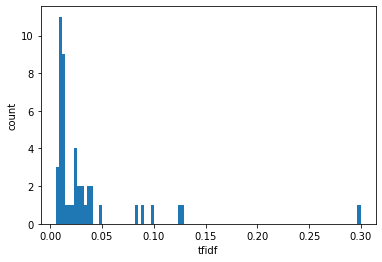

In [10]:
import matplotlib.pyplot as plt

plt.hist(tfidf['living_room'].values(),bins=100)
#plt.xlim([0,0.1])
plt.xlabel('tfidf')
plt.ylabel('count')

In [11]:
for ob in tfidf['living_room'].keys():
    if tfidf['living_room'][ob]>0.03:
        print(ob)

sofa
table
light
wall
living room
room
chair
coffee table
lamp
cabinet
window
curtain
flower
counter


In [12]:
# ONLY 2 CLASS VER

docs = []
vocab = set()
total = dict() #number of terms in each doc
freq = dict()

freq['bedroom'] = dict()
total['bedroom'] = 0
s = ""
for ob, cnt in d1['52'].items():
    obj = checkObj(ob)
    s += (ob + " ") * cnt
    if obj not in freq['bedroom'].keys():
        freq['bedroom'][obj] = cnt
    else:
        freq['bedroom'][obj] += cnt
    total['bedroom'] += cnt
    vocab.add(obj)
docs.append(s)

freq['notBed'] = dict()
total['notBed'] = 0
s = ""
for cla, obs in d1.items():
    if cla == '52':
        continue
    for ob, cnt in obs.items():
        obj = checkObj(ob)
        s += (obj + " ") * cnt
        vocab.add(obj)
        total['notBed'] += cnt
        if obj not in freq['notBed'].keys():
            freq['notBed'][obj] = cnt
        else:
            freq['notBed'][obj] += cnt
docs.append(s)

vocab = list(vocab)
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocab)), ('tfid', TfidfTransformer())]).fit(docs)
idf = pipe['tfid'].idf_

tf = deepcopy(freq)
for cla in tf.keys():
    for ob in tf[cla].keys():
        tf[cla][ob] = tf[cla][ob] / total[cla]

tfidf = deepcopy(tf)
for cla in tfidf.keys():
    for ob in tfidf[cla].keys():
        tfidf[cla][ob] = tfidf[cla][ob] * get_idf(ob, idf, vocab)

Text(0, 0.5, 'count')

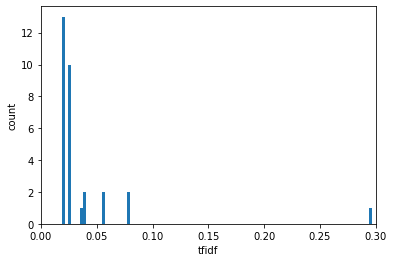

In [13]:
plt.hist(tfidf['bedroom'].values(),bins=100)
plt.xlim([0,0.3])
plt.xlabel('tfidf')
plt.ylabel('count')

In [14]:
for ob in tfidf['bedroom'].keys():
    if tfidf['bedroom'][ob]>0.02:
        print(ob)

bed
pillows
pillow case
bedroom
lampshade
room
couple
people
cats
birthday cake
farm
wall
head board
toy
banner
cake
post
vegetable


Now, suppose we choose a class C and a set of feature f[]

In [32]:
# check tfidf in CP
dc = dict()
for filename in img2objCP.keys():
    cla = filename.split('_')[0]
    if cla not in dc.keys():
        dc[cla] = dict()
    else:
        for e in img2objCP[filename]:
            if e == 'None':
                continue
            if e not in dc[cla].keys():
                dc[cla][e] = 1
            else:
                dc[cla][e] += 1
docsc = []
vocabc = set()
totalc = dict() #number of terms in each doc
freqc = dict()
for cla, obs in dc.items():
    s = ""
    freqc[labels[cla]] = dict()
    totalc[labels[cla]] = 0
    for ob, cnt in obs.items():
        ob = checkObj(ob)
        s += (ob + " ") * cnt
        vocabc.add(ob)
        totalc[labels[cla]] += cnt
        if ob not in freqc[labels[cla]].keys():
            freqc[labels[cla]][ob] = cnt
        else:
            freqc[labels[cla]][ob] += cnt
    docsc.append(s)

vocabc = list(vocabc)
pipec = Pipeline([('count', CountVectorizer(vocabulary=vocabc)), ('tfid', TfidfTransformer())]).fit(docsc)
idfc = pipec['tfid'].idf_

tfc = deepcopy(freqc)
for cla in tfc.keys():
    for ob in tfc[cla].keys():
        tfc[cla][ob] = tfc[cla][ob] / totalc[cla]

tfidfc = deepcopy(tfc)
for cla in tfidfc.keys():
    for ob in tfidfc[cla].keys():
        tfidfc[cla][ob] = tfidfc[cla][ob] * get_idf(ob, idfc, vocabc)

Text(0, 0.5, 'count')

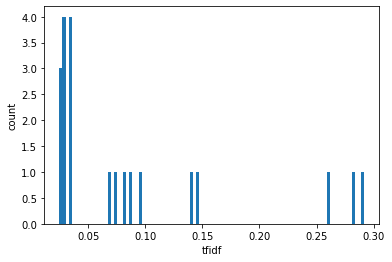

In [33]:
cn = 'kindergarten_classroom'
plt.hist(tfidfc[cn].values(),bins=100)
#plt.xlim([0,0.05])
plt.xlabel('tfidf')
plt.ylabel('count')

In [34]:
for ob in tfidfc[cn].keys():
    if tfidfc[cn][ob]>0.03:
        print(ob)

window
girl
boy
chair
shirt
hair
man
eye
hat
flag
book
board
woman
room


In [226]:
# indicate cIdx and features here!

cIdx = 'bedroom'
#feats = ['counter', 'vase', 'table', 'couch', 'light', 'shelf', 'screen', 'fireplace', 'chair','book','curtain','person','window','rug'] # <-- 215 living_room
#feats = ['stove','plate','oven','person','sink','grate','counter', 'cupboard','dishwasher', 'kid', 'apron', 'food', 'pan', 'jar', 'table'] # <--203 kitchen
#feats = ['window', 'kid', 'chair', 'adult', 'flag', 'book', 'board', 'table'] # <-- 202 kindergarden_classroom
#feats = ['cup', 'speaker', 'screen', 'water', 'desk', 'chair', 'table', 'person','window'] # <-- 102 conference_room
#feats = ['sink','shower','tub','toilet','towel','tile','toiletries','mirror','counter'] #<-- 45 bathroom
#feats = ['table', 'bed', 'window', 'chair', 'book', 'shelf', 'drawer', 'curtain', 'closet', 'basket']  #<-- 124 dorm_room
feats = ['bed', 'lampshade', 'couple', 'cats', 'banner', 'post'] #<-- 52 bedroom

def objSynonym(obj):
    syn = dict()
    syn['light'] = ['light', 'lamp', 'lamps']
    syn['vase'] = ['vase', 'flower', 'flowers', 'vases']
    syn['couch'] = ['couch', 'sofa', 'couches']
    syn['stove'] = ['stove', 'stovetop']
    syn['plate'] = ['plate', 'plates', 'bowl', 'bowls']
    syn['pan'] = ['pan', 'pans', 'pot', 'pots']
    syn['kid'] = ['boy', 'girl', 'kid', 'kids']
    syn['cup'] = ['cup', 'glass', 'cups']
    syn['flag'] = ['flag', 'flags']
    syn['board'] = ['board', 'boards']
    syn['speaker'] = ['speaker', 'speakers']
    syn['screen'] = ['screen', 'tv', 'screens', 'television']
    syn['desk'] = ['desk', 'desks']
    syn['adult'] = ['adult', 'man', 'woman', 'men', 'women', 'adults']
    syn['person'] = ['person', 'people', 'man', 'men', 'woman', 'women', 'audience', 'adult', 'adults']
    syn['bed'] = ['bed', 'bed frame', 'pillow','pillows', 'blanket', 'bedding', 'sheets', 'mattress', 'sheet']
    syn['lamp'] = ['lampshade','lamp']
    syn['couple'] = ['couple', 'couples']
    syn['window'] = ['window', 'windows']
    syn['cat'] = ['cat', 'cats']
    syn['banner'] = ['banner', 'banners']
    syn['post'] = ['post', 'posts']
    syn['toy'] = ['toy', 'toys']
    syn['table'] = ['table', 'tables','coffee table']
    syn['chair'] = ['chair','chairs']
    syn['book'] = ['book', 'books']
    syn['shelf'] = ['shelf', 'shelves']
    syn['drawer'] = ['drawer', 'drawers']
    syn['curtain'] = ['curtain', 'curtains']
    syn['closet'] = ['closet', 'dresser']
    syn['basket'] = ['basket', 'baskets']
    syn['sink'] = ['bathroom sink', 'sink','tap']
    syn['shower'] = ['shower', 'shower curtain']
    syn['tub'] = ['tub', 'bathtub', 'bath tub']
    syn['toilet'] = ['toilet','toilet bowl']
    syn['towel'] = ['towel', 'towel rack']
    syn['tile'] = ['tile', 'tiles']
    syn['toiletries'] = ['toiletries', 'soap dispenser', 'hair dryer', 'brush', 'tooth brush']
    syn['mirror'] = ['mirror', 'mirrors']
    syn['counter'] = ['counter', 'countertop', 'counters']
    if obj in syn.keys():
        return syn[obj]
    else:
        return [obj,obj+'s']

Text(0.5, 1.0, 'Class Distribution of FP Condition')

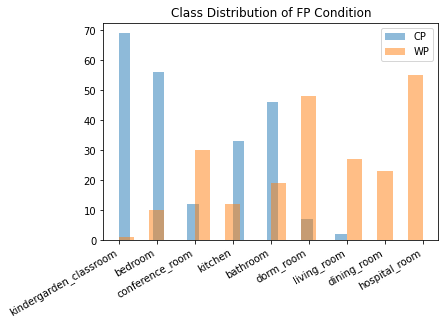

In [4]:
# see the class distribution in CP and FP
import os

gt = pd.read_excel("data/FP/Testing/scene.xlsx")

directory = 'data/FP/Testing/crowdsourcedPic/'
temp = []
for filename in os.listdir(directory):
    if (filename.endswith(".jpg") or filename.endswith(".png")):
        temp.append(gt[gt['image_name']==filename]['label'].any())


directory = 'data/FP/Testing/correct/'
temp1 = []
for filename in os.listdir(directory):
    if (filename.endswith(".jpg") or filename.endswith(".png")):
        temp1.append(gt[gt['image_name']==filename]['label'].any())


ax = plt.subplot()
plt.hist(temp1, alpha=0.5, bins=20, label='CP')
plt.hist(temp, alpha=0.5,bins=20, label='WP')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='upper right')
plt.title('Class Distribution of FP Condition')

In [7]:
fpd = dict()
for n in temp:
    if n not in fpd.keys():
        fpd[n] = 1
    else:
        fpd[n] += 1
cpd = dict()
for n in temp1:
    if n not in cpd.keys():
        cpd[n] = 1
    else:
        cpd[n] += 1
fin = dict()
for n in cpd.keys():
    fin[n] = cpd[n] / fpd[n]
fin

{'kindergarden_classroom': 69.0,
 'bedroom': 5.6,
 'conference_room': 0.4,
 'kitchen': 2.75,
 'bathroom': 2.4210526315789473,
 'dorm_room': 0.14583333333333334,
 'living_room': 0.07407407407407407}

(array([30.,  0., 23.,  0.,  0., 48.,  0., 55.,  0.,  0.,  1.,  0., 12.,
         0.,  0., 27.,  0., 19.,  0., 10.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 20 artists>)

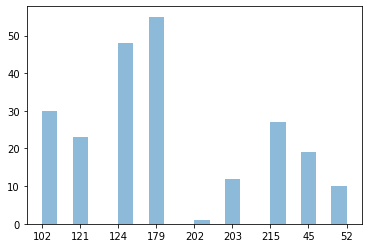

In [22]:
plt.hist(temp, alpha=0.5,bins=20, label='FP')

# Match saliency map with original image to get salient objects

In [10]:
import torch
from torch.autograd import Variable as V
import torchvision.models as models
from torchvision import transforms as trn
from torch.nn import functional as F
import numpy as np
import pandas as pd

import os
import cv2
import argparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_model(model_path, labels):
    model = models.resnet152(num_classes=len(labels))
    checkpoint = torch.load(model_path,map_location='cpu')
    state_dict = {str.replace(k,'module.',''): v for k, v in checkpoint['state_dict'].items()}
    model.load_state_dict(state_dict)

    # hacky way to deal with the upgraded batchnorm2D and avgpool layers...
    for i, (name, module) in enumerate(model._modules.items()):
        module = recursion_change_bn(model)

    model.eval()
    # hook the feature extractor
    features_names = ['layer4'] # this is the last conv layer of the resnet
    for name in features_names:
        model._modules.get(name).register_forward_hook(hook_feature)
    return model

def returnTF():
    # load the image transformer
    normalize = trn.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    tf = trn.Compose([
        trn.Resize(256),
        trn.CenterCrop(224),
        trn.ToTensor(),
        normalize,
    ])
    return tf

#this function generates saliency maps
def returnCAM(feature_conv, weight_softmax, class_idx):
    # generate the class activation maps upsample to 256x256
    size_upsample = (256, 256)
    nc, h, w = feature_conv.shape
    output_cam = []
    for idx in class_idx:
        cam = weight_softmax[class_idx].dot(feature_conv.reshape((nc, h*w)))
        cam = cam.reshape(h, w)
        cam = cam - np.min(cam)
        cam_img = cam / np.max(cam)
        #
        cam_img = np.where(cam_img < 0.5, 0, cam_img)
        cam_img = np.uint8(255 * cam_img)
        output_cam.append(cv2.resize(cam_img, size_upsample))
        
    return output_cam

def hook_feature(module, input, output):
    features_blobs.append(np.squeeze(output.data.cpu().numpy()))
    
def load_labels(label_path):
    classes = list()
    with open(label_path) as class_file:
        for line in class_file:
            classes.append(line.strip().split('\t')[1])
    classes = tuple(classes)
    return classes

def recursion_change_bn(module):
    if isinstance(module, torch.nn.BatchNorm2d):
        module.track_running_stats = 1
    else:
        for i, (name, module1) in enumerate(module._modules.items()):
            module1 = recursion_change_bn(module1)
    return module

In [124]:
# get salient objects bounding box, run this block twice for FP and CP separately and save csv
# if you already have the csv file, no need to run this

#directory = 'data/FP/Testing/crowdsourcedPic/'
directory = 'data/FN/Testing/FNwp/'
features_blobs = []
#output_dir = 'data/FP/Testing/cropped/'
output_dir = 'data/FN/Testing/WP_cropped/'
#filename = '45_00000098.jpg'
# load the labels
#classes = load_labels('data/FP/category.txt')
classes = load_labels('data/FN/category.txt')

# load the model
#model = load_model('data/FP/Model/model_best.pth.tar', classes)
model = load_model('data/FN/Model/model_best.pth.tar', classes)

# load the transformer
tf = returnTF()  # image transformer

# get the softmax weight
params = list(model.parameters())
weight_softmax = params[-2].data.numpy()
weight_softmax[weight_softmax < 0] = 0

counter = 0

bbox_saliency = pd.DataFrame(columns=['filename','x1','y1','x3','y3'])


for filename in os.listdir(directory):
    if (filename.endswith(".jpg") or filename.endswith(".png")):

            #try:
                # load the test image
                img = Image.open(os.path.join(directory, filename))
                input_img = V(tf(img).unsqueeze(0))

                # forward pass
                logit = model.forward(input_img)
                h_x = F.softmax(logit, 1).data.squeeze()
                probs, idx = h_x.sort(0, True)
                probs = probs.numpy()
                idx = idx.numpy()

                p_label = classes[idx[0]]

                # output the prediction of scene category
                items = []
                print('--SCENE CATEGORIES:')
                for i in range(0, 3):
                    items.append(float(probs[i]))
                    items.append(classes[idx[i]])
                    #print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))

                confidence = items[0]
                prediction = items[1]
                print(filename + ": " + prediction + "(" + str(confidence) + ")")
                

                # generate attention heatmap
                CAMs = returnCAM(features_blobs[counter], weight_softmax, [idx[0]])

                img = cv2.imread(os.path.join(directory, filename))
                height, width, _ = img.shape
                heatmap = cv2.applyColorMap(cv2.resize(CAMs[0],(width, height)), cv2.COLORMAP_JET)
                result = heatmap * 0.4 + img * 0.5
                
                hsvheat = cv2.cvtColor(heatmap, cv2.COLOR_RGB2HSV)
                down = (90, 100, 20)
                up = (130, 255, 255)
                mask = cv2.inRange(hsvheat, down, up)
                res = cv2.bitwise_and(img, img, mask=mask)
                mask = None
                cv2.imwrite(os.path.join(output_dir, filename), res)
                
                # cropped --> bounding box
                gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)

                # threshold
                thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

                # get contour bounding boxes and draw on copy of input
                contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                contours = contours[0] if len(contours) == 2 else contours[1]
                result = res.copy()
                for c in contours:
                    x,y,w,h = cv2.boundingRect(c)
                    cv2.rectangle(result, (x, y), (x+w-1, y+h-1), (0, 0, 255), 1)
                    print((x, y), (x+w-1, y+h-1))
                    s2 = pd.Series([filename, x, y, x+w-1, y+h-1], index=['filename', 'x1', 'y1', 'x3', 'y3'])
                    bbox_saliency = pd.concat([bbox_saliency, s2.to_frame().T], ignore_index=True)
                
                
                counter = counter + 1
            #except:
             #   print(filename)
bbox_saliency.to_csv("bbox_saliency_wp_fn.csv")

--SCENE CATEGORIES:
IMG_2830.jpg: hotel_room(0.8617343306541443)
(1855, 952) (2047, 1021)
(941, 685) (1425, 1154)
--SCENE CATEGORIES:
kindergarten_ansicht1.jpg: classroom(0.6491264700889587)
(66, 263) (168, 321)
(329, 256) (359, 287)
(0, 86) (115, 186)
--SCENE CATEGORIES:
121_00002391.jpg: conference_room(0.7137753963470459)
(251, 228) (714, 336)
--SCENE CATEGORIES:
203_00004427.jpg: hotel_room(0.706827700138092)
(0, 239) (79, 317)
(252, 229) (466, 406)
--SCENE CATEGORIES:
121_00002839.jpg: conference_room(0.7859805822372437)
(364, 97) (475, 238)
--SCENE CATEGORIES:
121_00000784.jpg: hotel_room(0.6750852465629578)
(0, 157) (93, 280)
(360, 99) (534, 256)
--SCENE CATEGORIES:
121_00000141.jpg: conference_room(0.7443848848342896)
(231, 161) (682, 340)
--SCENE CATEGORIES:
121_00004441.jpg: conference_room(0.5757601261138916)
(99, 316) (511, 521)
--SCENE CATEGORIES:
int213.jpg: hotel_room(0.6299023628234863)
(108, 127) (255, 228)
(163, 89) (166, 118)
(184, 0) (206, 23)
--SCENE CATEGORIES:
20

--SCENE CATEGORIES:
203_00004257.jpg: conference_room(0.8507136106491089)
(241, 160) (682, 511)
--SCENE CATEGORIES:
203_00000838.jpg: dining_room(0.8303263187408447)
(0, 232) (179, 311)
(271, 183) (639, 402)
(211, 0) (245, 46)
--SCENE CATEGORIES:
int107.jpg: hotel_room(0.7195013761520386)
(235, 127) (255, 128)
(0, 124) (21, 131)
(86, 102) (192, 138)
(89, 41) (159, 88)
--SCENE CATEGORIES:
121_00001349.jpg: conference_room(0.6596180200576782)
(160, 169) (610, 332)
--SCENE CATEGORIES:
215_00004048.jpg: dining_room(0.619289219379425)
(413, 491) (511, 646)
(189, 474) (324, 646)
(105, 318) (113, 328)
--SCENE CATEGORIES:
aa041717.jpg: hotel_room(0.6395514607429504)
(159, 52) (255, 158)
--SCENE CATEGORIES:
202_00000949.jpg: hospital_room(0.6492517590522766)
(186, 0) (274, 106)
--SCENE CATEGORIES:
45_00001817.jpg: childs_room(0.8359997868537903)
(253, 536) (511, 724)
(378, 170) (425, 291)
(389, 0) (511, 146)
(0, 0) (204, 186)
--SCENE CATEGORIES:
121_00000294.jpg: conference_room(0.7083410024642

--SCENE CATEGORIES:
c_26.jpg: childs_room(0.7950193285942078)
(0, 447) (44, 479)
(219, 420) (354, 479)
(396, 228) (426, 251)
(0, 154) (68, 188)
(222, 98) (281, 107)
--SCENE CATEGORIES:
Places365_val_00024526.jpg: hospital_room(0.8364616632461548)
(409, 77) (591, 186)
--SCENE CATEGORIES:
Places365_val_00009488.jpg: hotel_room(0.8587782979011536)
(0, 272) (226, 342)
(241, 214) (639, 325)
--SCENE CATEGORIES:
Places365_val_00003614.jpg: hotel_room(0.8681219816207886)
(672, 169) (767, 409)
(0, 163) (283, 511)
--SCENE CATEGORIES:
121_00002470.jpg: conference_room(0.7202343344688416)
(0, 148) (511, 302)
--SCENE CATEGORIES:
Places365_val_00022392.jpg: childs_room(0.6477092504501343)
(0, 629) (39, 682)
(247, 623) (291, 682)
(438, 0) (511, 62)
(241, 0) (394, 280)
--SCENE CATEGORIES:
int486.jpg: childs_room(0.7501382231712341)
(0, 187) (120, 255)
(162, 0) (166, 20)
(84, 0) (98, 25)
--SCENE CATEGORIES:
202_00001681.jpg: classroom(0.7184868454933167)
(360, 270) (399, 299)
(267, 0) (399, 79)
(75, 0)

In [11]:
# get salient objects

# get ground truth for training rejector from CP
# Assumption! Salient objects = should know (only for CP)
# they will be training set for the rejector

bboxCP = pd.read_csv('data/FP/bbox_saliency_cp.csv')
bboxFP = pd.read_csv('data/FP/bbox_saliency_fp.csv')

gtCP = pd.read_csv('data/FP/correct_objects.csv')
gtFP = pd.read_csv('data/FP/objects_gt.csv')

In [12]:
#binary so far
# filename, class name, ground truth table
def getClass(filename,bclass,gt1):
    label = gt1[gt1['image_name']==filename]['label'].any()
    if label == bclass: #bedroom
        return 1
    else:
        return 0

def getIou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

# one bounding box can contain multiple salient objects!!!!
def getObject(box,img,df,datapath):
    iou = []
    boxes = []
    objs = []
    img1 = cv2.imread(os.path.join(datapath, img))
    w = img1.shape[0]
    h = img1.shape[1]
    size = 600
    if w < h:
        ow = size
        oh = size * h / w
        xScale = ow / w
        yScale = oh / h
    else:
        oh = size
        ow = size * w / h
        xScale = ow / w
        yScale = oh / h
    for row in df[df['filename']==img].iterrows():
        boxes.append([row[1]['x1']/xScale,row[1]['y1']/yScale,row[1]['x3']/xScale,row[1]['y3']/yScale])
        objs.append(row[1]['label'])
    for b in boxes:
        iou.append(getIou(box,b))
    res = []
    for i in range(len(iou)):
        score = iou[i]
        if score >= 0.15:
            res.append(objs[i])
    return res

#     for i in range(len(iou)):
#         s = iou[i]
#         if s >= 0.15 and s <= 0.16:
#             print(img)
#             print(box)
#             print(objs[i])
#     return iou

In [16]:
img2objCP = dict()
emp = set()

for row in bboxCP.iterrows():    
    filename = row[1]['filename']
    # the files do not have bbox with conf>0.5 from scenegraph
    if filename in ['45_00004025.jpg','124_00000461.jpg','45_00001465.jpg','45_00002978.jpg','203_00002853.jpg','102_00004661.jpg', '45_00002583.jpg']:
        continue
    if filename not in img2objCP.keys():
        img2objCP[filename] = []
    box = [row[1]['x1'],row[1]['y1'],row[1]['x3'],row[1]['y3']]
    #img2objCP[filename].append(getObject(box,filename,gtCP,'data/FP/Testing/fp/'))
    objs = getObject(box,filename,gtCP,'data/FP/Testing/fp/')
#     if len(objs)==0:
#         emp.add(filename)
#         print(filename)
#         img2objCP[filename].append("None")
    for o in objs:
        img2objCP[filename].append(o)

# for filename in img2objCP.keys():
#     if getClass(filename, cIdx) == 1:
#         print(img2objCP[filename])

In [190]:
empCP = []
for k,v in img2objCP.items():
    if len(v)==0:
        empCP.append(k)
len(empCP)

119

In [14]:
img2objFP = dict()
ious = []
for row in bboxFP.iterrows():    
    filename = row[1]['filename']
    if filename not in img2objFP.keys():
        img2objFP[filename] = []
    box = [row[1]['x1'],row[1]['y1'],row[1]['x3'],row[1]['y3']]
    objs = getObject(box,filename,gtFP,'data/FP/Testing/fp/')
    for o in objs:
        img2objFP[filename].append(o)
    #img2objFP[filename].append(getObject(box,filename,gtFP,True))

In [191]:
empFP = []
for k,v in img2objFP.items():
    if len(v)==0:
        empFP.append(k)
len(empFP)

61

Text(0.5, 1.0, 'Class Distribution of FP Condition (filtered out #salientObject = 0)')

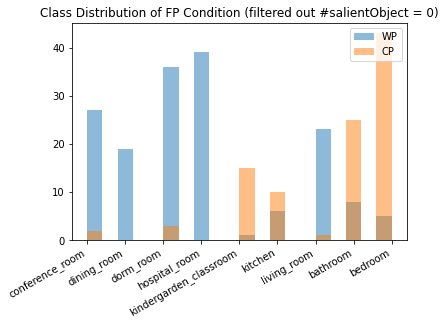

In [198]:
nonEmpCP = np.setdiff1d(list(img2objCP.keys()),empCP)
nonEmpFP = np.setdiff1d(list(img2objFP.keys()),empFP)
gt = pd.read_excel("data/FP/Testing/scene.xlsx")

temp = []
for filename in nonEmpCP:
    temp.append(gt[gt['image_name']==filename]['label'].any())

temp1 = []
for filename in nonEmpFP:
    temp1.append(gt[gt['image_name']==filename]['label'].any())

ax = plt.subplot()
plt.hist(temp1, alpha=0.5, bins=20, label='WP')
plt.hist(temp, alpha=0.5,bins=20, label='CP')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend(loc='upper right')
plt.title('Class Distribution of FP Condition (filtered out #salientObject = 0)')

# Format data for training rejector with img2objCP & img2objFP

In [227]:
# selected features (feats): 'bed', 'lamp', 'couple', 'cat', 'banner', 'post','toy'
gt1 = pd.read_excel("data/FP/Testing/scene.xlsx")
cols = ['filename', 'is'+cIdx, 'reject'] + feats
#cols = ['filename', 'reject'] + feats
cleaned = pd.DataFrame(columns=cols)
cleaned1 = pd.DataFrame(columns=cols) #removing img w no salient obj

for filename in img2objCP.keys():
    isClass = getClass(filename, cIdx, gt1)
    reject = 0
    thisFeat = dict()
    for f in feats:
        thisFeat[f] = 0
    for obj in img2objCP[filename]:
        for f in thisFeat.keys():
            if obj in objSynonym(f):
                thisFeat[f] = 1
    
    temp = []
    for f in thisFeat.keys():
        temp.append(thisFeat[f])
    
    add = pd.Series([filename, isClass, reject]+temp, index=cols)
    #add = pd.Series([filename, reject]+temp, index=cols)
    cleaned = pd.concat([cleaned, add.to_frame().T], ignore_index=True)
    
    flag = False
    thisFeat = dict()
    for f in feats:
        thisFeat[f] = 0
    if len(img2objCP[filename]) > 0:
        flag = True
        for obj in img2objCP[filename]:
            for f in thisFeat.keys():
                if obj in objSynonym(f):
                    thisFeat[f] = 1
    temp = []
    for f in thisFeat.keys():
        temp.append(thisFeat[f])
    if flag:
        add = pd.Series([filename, isClass, reject]+temp, index=cols)
        cleaned1 = pd.concat([cleaned1, add.to_frame().T], ignore_index=True)

for filename in img2objFP.keys():
    isClass = getClass(filename, cIdx, gt1)
    reject = 1
    thisFeat = dict()
    for f in feats:
        thisFeat[f] = 0

    for obj in img2objFP[filename]:
        for f in thisFeat.keys():
            if obj in objSynonym(f):
                thisFeat[f] = 1
    
    temp = []
    for f in thisFeat.keys():
        temp.append(thisFeat[f])
    
    add = pd.Series([filename, isClass, reject]+temp, index=cols)
    #add = pd.Series([filename, reject]+temp, index=cols)
    cleaned = pd.concat([cleaned, add.to_frame().T], ignore_index=True)
    
    flag = False
    thisFeat = dict()
    for f in feats:
        thisFeat[f] = 0
    if len(img2objFP[filename]) > 0:
        flag = True
        for obj in img2objFP[filename]:
            for f in thisFeat.keys():
                if obj in objSynonym(f):
                    thisFeat[f] = 1
    temp = []
    for f in thisFeat.keys():
        temp.append(thisFeat[f])
    if flag:
        add = pd.Series([filename, isClass, reject]+temp, index=cols)
        cleaned1 = pd.concat([cleaned1, add.to_frame().T], ignore_index=True)

In [228]:
cleaned

,filename,isbedroom,reject,bed,lampshade,couple,cats,banner,post
0,202_00004030.jpg,0,0,0,0,0,0,0,0
1,52_00001879.jpg,1,0,1,0,0,0,0,0
2,52_00004685.jpg,1,0,0,0,0,0,0,0
3,52_00004120.jpg,1,0,1,0,0,0,0,0
4,202_00003818.jpg,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
438,179_00002099.jpg,0,1,0,0,0,0,0,0
439,121_00000010.jpg,0,1,0,0,0,0,0,0
440,102_00003056.jpg,0,1,0,0,0,0,0,0
441,45_00001846.jpg,0,1,0,0,0,0,0,0


# Train Rejector

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

In [241]:
cleaned = cleaned.sample(frac=1)
cleaned1 = cleaned1.sample(frac=1)
#cleaned = pd.read_csv('crowdsourcing/trainRejectorData.csv')

split = int(cleaned.shape[0]*0.8)
train = cleaned[:split]
Xtrain = train.drop(['filename','reject','is'+cIdx],axis=1)
#Xtrain = train.drop(['filename','reject'],axis=1)
ytrain = train['reject'].astype('int')
test = cleaned[split:]
Xtest = test.drop(['filename','reject','is'+cIdx],axis=1)
#Xtest = test.drop(['filename','reject'],axis=1)
ytest = test['reject'].astype('int')

clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)
print("acc:", accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))
print(ytest[ytest==1].size / ytest.size)

acc: 0.550561797752809
[[ 9 34]
 [ 6 40]]
0.5168539325842697


In [230]:
svc = SVC(C=0.1)
svc.fit(Xtrain,ytrain)
ypred = svc.predict(Xtest)
print("acc:", accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

acc: 0.550561797752809
[[ 3 39]
 [ 1 46]]


In [537]:
model = RandomForestClassifier()
pipeline = Pipeline([
    ('forest', RandomForestClassifier())
])
# Parameter distributions
param_dist = {'forest__max_depth': [2,3,4,5],
              'forest__max_features': sp_randint(2, 57),      #Number of features per bag
              'forest__min_samples_split': sp_randint(2, 11), #Min number of samples in a leaf node split
              'forest__min_samples_leaf': sp_randint(1, 21),  #Min number of samples in a leaf node
              'forest__bootstrap': [True, False],             #Sample 
              'forest__n_estimators' :[1,2,3,4,5,10,50,75,100] #Number of trees in the forest
              #'forest__random_state' : [123,234]
}
#Search randomly over parameter space
random_search = RandomizedSearchCV(
    pipeline,
    param_dist,
    n_iter  =500,
    scoring ='roc_auc',
    n_jobs  =4,
    verbose =1,
    return_train_score=True
)
random_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


/Users/rikka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.63091595 0.57778474
 0.57033209        nan        nan        nan 0.57741543        nan
 0.58205068        nan        nan        nan        nan        nan
        nan        nan 0.55658209        nan        nan 0.58152495
        nan        nan        nan        nan        nan 0.60642568
 0.57087807        nan        nan        nan        nan        nan
        nan        nan 0.58131661        nan        nan        nan
        nan        nan        nan        nan        nan 0.58090485
 0.63884568 0.55616543 0.59507674 0.56543626 0.56569161        nan
 0.63196121 0.55533209 0.56925157        nan        nan        nan
 0.57064459        nan        nan 0.55908209        nan 0.60236318
        nan 0.56900307        nan        nan 0.57366543 0.60256335
        nan        nan        nan        

RandomizedSearchCV(estimator=Pipeline(steps=[('forest',
                                              RandomForestClassifier())]),
                   n_iter=500, n_jobs=4,
                   param_distributions={'forest__bootstrap': [True, False],
                                        'forest__max_depth': [2, 3, 4, 5],
                                        'forest__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb1c235f90>,
                                        'forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb0a0c3e90>,
                                        'forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdb08d7cdd0>,
                                        'forest__n_estimators': [1, 2, 3, 4, 5,
                                                                 10, 50, 75,
                                                                 100]},
                   return_train

In [538]:
model = random_search.best_estimator_
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
print("acc:", accuracy_score(ytest, ypred))
print(confusion_matrix(ytest, ypred))

acc: 0.5789473684210527
[[58 11]
 [45 19]]


In [363]:
cIdx

'kitchen'

# Value Evaluation

In [242]:
import os
import shutil

for root, dirs, files in os.walk('data/FP/Testing/rejector_test/'):
    for f in files:
        os.unlink(os.path.join(root, f))
    for d in dirs:
        shutil.rmtree(os.path.join(root, d))

In [243]:
# get all test images in a folder

files = list(test['filename'])
src = 'data/FP/Testing/fp/'
dst = 'data/FP/Testing/rejector_test/'

for file in files:
    shutil.copyfile(src+file, dst+file)

# save the predicted results to calculate value

directory = 'data/FP/Testing/rejector_test/'
features_blobs = []
pretrained_pred = pd.DataFrame(columns = ['filename','pred','gt','conf'])

# load the labels
classes = load_labels('data/FP/category.txt')

# load the model
model = load_model('data/FP/Model/model_best.pth.tar', classes)

# load the transformer
tf = returnTF()  # image transformer

# get the softmax weight
params = list(model.parameters())
weight_softmax = params[-2].data.numpy()
weight_softmax[weight_softmax < 0] = 0

for filename in os.listdir(directory):
    if (filename.endswith(".jpg") or filename.endswith(".png")):

            #ftry:
                # load the test image
                img = Image.open(os.path.join(directory, filename))
                input_img = V(tf(img).unsqueeze(0))

                # forward pass
                logit = model.forward(input_img)
                h_x = F.softmax(logit, 1).data.squeeze()
                probs, idx = h_x.sort(0, True)
                probs = probs.numpy()
                idx = idx.numpy()

                p_label = classes[idx[0]]

#                 # output the prediction of scene category
#                 items = []
#                 print('--SCENE CATEGORIES:')
#                 for i in range(0, 1):
#                     items.append(float(probs[i]))
#                     items.append(classes[idx[i]])
#                     #print('{:.3f} -> {}'.format(probs[i], classes[idx[i]]))
                
                if classes[idx[0]]==cIdx:
                    pred = 1
                    conf = float(probs[0])
                else:
                    pred = 0
                    conf = 1-float(probs[np.where(idx==1)])
                
                if filename.split("_")[0] == cIdx:
                    gt = 1
                else:
                    gt = 0
                
                add = pd.Series([filename,pred,gt,conf], index=['filename','pred','gt','conf'])
                pretrained_pred = pd.concat([pretrained_pred, add.to_frame().T], ignore_index=True)
                print(filename + ": " + classes[idx[0]] + "(" + str(probs[0]) + ")")
#             except:
#                 print("can't process "+filename)

215_00001422.jpg: kindergarden_classroom(0.92210877)
203_00001199.jpg: kindergarden_classroom(0.7777235)
179_00000906.jpg: bathroom(0.6656507)
202_00001765.jpg: kindergarden_classroom(0.9621145)
45_00002776.jpg: kindergarden_classroom(0.73794407)
52_00004917.jpg: bathroom(0.8039575)
52_00000750.jpg: bedroom(0.8449427)
202_00001012.jpg: kindergarden_classroom(0.87299734)
52_00004654.jpg: bedroom(0.67055595)
179_00004597.jpg: kindergarden_classroom(0.83337003)
179_00004743.jpg: kindergarden_classroom(0.7236319)
215_00000115.jpg: bedroom(0.6910625)
121_00004320.jpg: conference_room(0.64066225)
45_00000978.jpg: bathroom(0.23077255)
45_00004505.jpg: bathroom(0.9010259)
215_00001157.jpg: kitchen(0.7063137)
45_00003452.jpg: bathroom(0.7915589)
124_00001644.jpg: kindergarden_classroom(0.67687744)
203_00003129.jpg: kitchen(0.5044113)
202_00000792.jpg: kindergarden_classroom(0.47126603)
45_00004398.jpg: bathroom(0.7122371)
45_00001592.jpg: bathroom(0.9401208)
124_00003223.jpg: dorm_room(0.383360

<AxesSubplot:>

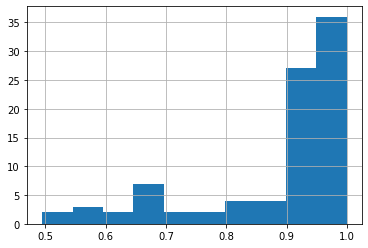

In [244]:
pretrained_pred['conf'].hist()

In [246]:
t = test.copy()
t['rejected'] = ypred
p = t[t['rejected']==0].merge(pretrained_pred, how='left', on='filename')
p[p['pred']==p['gt']].shape[0]/p.shape[0]

0.13333333333333333

In [247]:
rejed = t[t['rejected']==1]['filename']
with open("data/rej_final/FP_"+cIdx+"_rejected.txt", 'w') as f:
    for rej in rejed:
        c = gt1[gt1['image_name']==rej]['label'].any()
        f.write(rej +","+c+ '\n')
f.close()

In [248]:
t = test.copy()
t['rejected'] = ypred
p = t.merge(pretrained_pred, how='left', on='filename')
print("original acc:",p[p['pred']==p['gt']].shape[0]/p.shape[0])

original acc: 0.6966292134831461


In [249]:
#test and ypred is all from rejector training

def getRhoAlpha(test,ypred,pretrained_pred):
    rho = len(ypred[ypred==1])/len(ypred)
    t = test.copy()
    t['rejected'] = ypred
    accepted = t[t['rejected']==0]
    new = accepted.merge(pretrained_pred, how='left', on='filename')
    alpha = new[new['pred']==new['gt']].shape[0]/new.shape[0]
    return rho, alpha

rho, alpha = getRhoAlpha(test,ypred,pretrained_pred)
vr = []
kr = np.arange(0,10,0.1)
for k in kr:
    vr.append((1-rho)*(alpha-k*(1-alpha)))

Text(0.5, 1.0, 'reject distribution_bedroom')

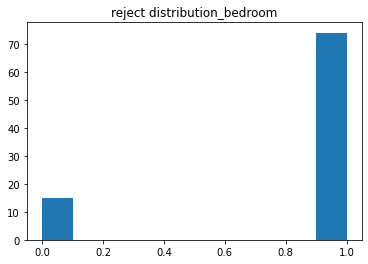

In [251]:
plt.hist(ypred)
plt.title('reject distribution_'+cIdx)

In [252]:
t = test.copy()
t['rejected'] = ypred
print("in all:",len(t[t['is'+cIdx]==1])/len(t))
temp = t[t['rejected']==0]['is'+cIdx]
print("among accepted:",len(temp[temp==1])/len(temp))
temp = t[t['rejected']==1]['is'+cIdx]
print("among rejected:",len(temp[temp==1])/len(temp))

in all: 0.14606741573033707
among accepted: 0.6666666666666666
among rejected: 0.04054054054054054


In [254]:
# calculate value for condition with no rejection

new_a = pretrained_pred[pretrained_pred['pred']==pretrained_pred['gt']].shape[0]/pretrained_pred.shape[0]

v2 = []
k2 = np.arange(0,10,0.1)
for k in k2:
    v2.append((1-0)*(new_a-k*(1-new_a)))

In [255]:
# confidence based

v3 = []

for k in kr:
    t = (k)/(k+1)
    rho = pretrained_pred[pretrained_pred['conf']<t].shape[0]/pretrained_pred.shape[0]
    accepted = pretrained_pred[pretrained_pred['conf']>=t]
    alpha = accepted[accepted['pred']==accepted['gt']].shape[0]/accepted.shape[0]
    v3.append((1-rho)*(alpha-k*(1-alpha)))

In [256]:
#first confidence, then features
v4 = []

for k in kr:
    t = (k)/(k+1)

    accepted = pretrained_pred[pretrained_pred['conf']>=t]
    
    t1 = test.copy()
    t1['rejected'] = ypred
    
    temp = accepted.merge(t1, on='filename', how='left')
    accepted1 = temp[temp['rejected']==0]
    
    rho = 1-(accepted1.shape[0]/pretrained_pred.shape[0])
    
    if accepted1.shape[0] != 0:
        alpha = accepted1[accepted1['pred']==accepted1['gt']].shape[0]/accepted1.shape[0]
        v4.append((1-rho)*(alpha-k*(1-alpha)))
    else:
        v4.append((accepted1[accepted1['pred']==accepted1['gt']].shape[0] - k * accepted1[accepted1['pred']!=accepted1['gt']].shape[0]) / t1.shape[0])

In [257]:
#optimal
v5 = []

df = pd.read_csv('data/costbased/'+"FP_"+cIdx+"_costBased_test.csv")
i = 0
for k in kr:
    t = df.iloc[i][' t_optimal']
    i += 1
    rho = pretrained_pred[pretrained_pred['conf']<t].shape[0]/pretrained_pred.shape[0]
    accepted = pretrained_pred[pretrained_pred['conf']>=t]
    if accepted.shape[0] > 0:
        alpha = accepted[accepted['pred']==accepted['gt']].shape[0]/accepted.shape[0]
        v5.append((1-rho)*(alpha-k*(1-alpha)))
    else:
        v5.append(0)

In [258]:
df[' t_optimal'].unique()

array([0.  , 0.74])

In [259]:
#optimal + rejctor

v6 = []
i = 0
for k in kr:
    t = df.iloc[i][' t_optimal']
    i += 1

    accepted = pretrained_pred[pretrained_pred['conf']>=t]
    
    if accepted.shape[0] > 0:  
        t1 = test.copy()
        t1['rejected'] = ypred
        temp = accepted.merge(t1, on='filename', how='left')
        accepted1 = temp[temp['rejected']==0]
        rho = 1-(accepted1.shape[0]/pretrained_pred.shape[0])
        if accepted1.shape[0] > 0:
            alpha = accepted1[accepted1['pred']==accepted1['gt']].shape[0]/accepted1.shape[0]
            v6.append((1-rho)*(alpha-k*(1-alpha)))
        else:
            v6.append(0)
    else:
        v6.append(0)

In [260]:
np.save("data/stats/SceneRej_FP_"+cIdx+".npy",vr)
np.save("data/stats/NoRej_FP_"+cIdx+".npy",v2)
np.save("data/stats/theoretical_FP_"+cIdx+".npy",v3)
np.save("data/stats/t+f_FP_"+cIdx+".npy",v4)
np.save("data/stats/optimal_FP_"+cIdx+".npy",v5)
np.save("data/stats/o+SceneRej_FP_"+cIdx+".npy",v6)

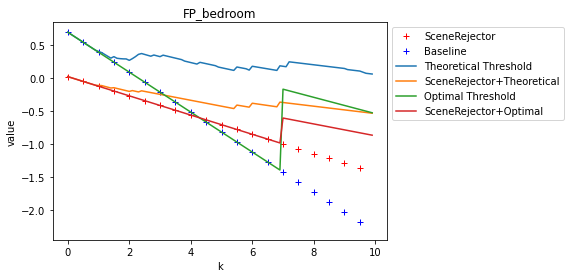

In [261]:
import matplotlib.pyplot as plt

ax = plt.subplot()
ax.plot(kr,vr,'r+',label='SceneRejector',markevery=5)
ax.plot(kr,v2,'b+',label='Baseline',markevery=5)
ax.plot(kr,v3,label='Theoretical Threshold')
ax.plot(kr,v4,label='SceneRejector+Theoretical')
ax.plot(kr,v5,label='Optimal Threshold')
ax.plot(kr,v6,label='SceneRejector+Optimal')
plt.xlabel("k")
plt.ylabel("value")
plt.legend()
#plt.legend(['rejector','no rejector','baseline'])
plt.title("FP_"+cIdx+"")
lgd = ax.legend(bbox_to_anchor=(1.0,1), loc="upper left")
text = ax.text(-0.2,1.05, "", transform=ax.transAxes)

plt.savefig("data/figure/"+"FP_"+cIdx+".png", bbox_extra_artists=(lgd,text), bbox_inches='tight')

In [38]:
# Pick 225 correctly predicted images for FN model
import os
import random

crowdsourced = list(df['image_name'].unique())
already = list(dfS0['filename'].unique())
arr = os.listdir('data/FN/Testing/fn/')
random.shuffle(arr)
select = []
c = 0
d = 0

data_path = 'data/FN/Testing/fn/'
features_blobs = []

# load the labels
classes = load_labels('data/FN/category.txt')

# load the model
model = load_model('data/FN/Model/model_best.pth.tar', classes)

# load the transformer
tf = returnTF()  # image transformer

gt = pd.read_excel("data/FN/Testing/scene.xlsx")

# get the softmax weight
params = list(model.parameters())
weight_softmax = params[-2].data.numpy()
weight_softmax[weight_softmax < 0] = 0

for filename in arr:
    if filename.endswith(".jpg") or filename.endswith(".png"):
        label = gt[gt['image_name']==filename]['label'].any()
        try:
            # load the test image
            img = Image.open(os.path.join(data_path, filename))
            input_img = V(tf(img).unsqueeze(0))
            
            # forward pass
            logit = model.forward(input_img)
            h_x = F.softmax(logit, 1).data.squeeze()
            probs, idx = h_x.sort(0, True)
            probs = probs.numpy()
            idx = idx.numpy()
            print(probs[0], classes[idx[0]])
            print(label)
            if (label==classes[idx[0]]):
                if filename not in crowdsourced and filename not in already:
                    select.append(filename)
                    c += 1
            if c >= 7:
                break
        except:
            print(filename, "cannot be processed")

0.20407851 bathroom
kitchen
0.92067045 kitchen
kitchen
0.45435956 conference_room
bathroom
0.2990476 bedroom
hospital_room
0.70981866 kindergarden_classroom
kindergarden_classroom
0.9661292 conference_room
conference_room
0.5982941 kindergarden_classroom
kindergarden_classroom
0.38410422 dorm_room
kitchen
0.54688925 bedroom
bedroom
0.8079868 kindergarden_classroom
kindergarden_classroom
0.5548195 bedroom
bedroom


In [42]:
import shutil
from os.path import exists

dfS0 = pd.read_csv('data/FN/correct_objects_FN.csv')
select = list(dfS0['filename'].unique())
original = 'data/FN/Testing/fn/'
target = 'data/FN/Testing/correct/'
c = 0
for file in select:
    if (not exists(original+file)):
        print(file)
    shutil.copyfile(original+file, target+file)
    c+=1
c

225